In [1]:
import numpy as np
from dgamod import *
import cmath as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
import os
mpl.rcParams.update({'font.size': 12})
plt.rcParams['axes.axisbelow'] = True
%matplotlib widget
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrkmyc')

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "g", "r", 'k','y' , 'm','tab:orange', 'tab:cyan', 'tab:brown', 'slategrey', 'deeppink' ]) 

In [2]:
def compare_mean(dataframes, title = False, attribute = 'fitness', labels = False, figsize = [12,5], save = False):
    
    axs = plt.figure(figsize=figsize)

    if not title:
        title = 'Mean ' + attribute
    
    for i in range(len(dataframes)):
        dataframe = dataframes[i]
        
        if labels:
            label = labels[i]

        grouped_df = dataframe.groupby('dimension')
        mean = grouped_df[attribute].mean()
        std = grouped_df[attribute].std()
        min_value = grouped_df[attribute].min()
        max_value = grouped_df[attribute].max()

        stats = pd.DataFrame({'mean': mean, 'std': std, 'min': min_value,
                            'max': max_value})

        stats = stats.reset_index()

        plt.errorbar(stats['dimension'],stats['mean'], yerr=stats['std'],fmt='o-',label = label,capsize=4, zorder=-2)
    plt.grid(True)
    plt.legend()
    plt.xlabel('N')
    plt.ylabel(attribute)
    plt.title(title)

    if save:
        plt.savefig(save + 'mean' +attribute + '.png')
    return True

def compare_maxmin(dataframes, maxmin = 'max',title = False, attribute = 'fitness', labels = False, figsize = [12,5], save = False):
    
    axs = plt.figure(figsize=figsize)

    if not title:
        title = 'Mean' + attribute
    
    for i in range(len(dataframes)):
        dataframe = dataframes[i]
        
        if labels:
            label = labels[i]

        grouped_df = dataframe.groupby('dimension')
        mean = grouped_df[attribute].mean()
        std = grouped_df[attribute].std()
        min_value = grouped_df[attribute].min()
        max_value = grouped_df[attribute].max()

        stats = pd.DataFrame({'mean': mean, 'std': std, 'min': min_value,
                            'max': max_value})

        stats = stats.reset_index()
        if maxmin == 'max':
            plt.plot(stats['dimension'],stats['max'], 'o-',label = label)
        if maxmin == 'min':
            plt.plot(stats['dimension'],stats['min'], 'o-',label = label)

    plt.grid(True)
    plt.legend()
    plt.xlabel('N')
    plt.ylabel(attribute)
    plt.title(title)

    if save:
        plt.savefig(save + maxmin +attribute + '.png')

    return True

In [9]:
# -------------------------------------------------
# separated instances version dataframe
# -------------------------------------------------

n_values = np.arange(6,20)

column_names = ['dimension', 'sample', 'fidelity', 'time', 'generations', 'cpu_time']
si_df = pd.DataFrame(columns=column_names)

for n in n_values:
    file = '/home/speron/dynga/dinamic_ga/n{}_si/nvsmaxfid.dat'.format(n)
    df = pd.read_csv(file, delimiter = ' ', names = column_names)
    si_df = pd.concat([si_df,df])

separated_instances = si_df
separated_instances 

# -------------------------------------------------
# original version dataframe
# -------------------------------------------------

n_values = np.arange(6,20)

column_names = ['dimension', 'sample', 'fidelity', 'time', 'generations', 'cpu_time']
og_df = pd.DataFrame(columns=column_names)

for n in n_values:
    file = '/home/speron/dynga/dinamic_ga/n{}_og/nvsmaxfid.dat'.format(n)
    df = pd.read_csv(file, delimiter = ' ', names = column_names)
    og_df = pd.concat([og_df,df])

original_version = og_df 

True

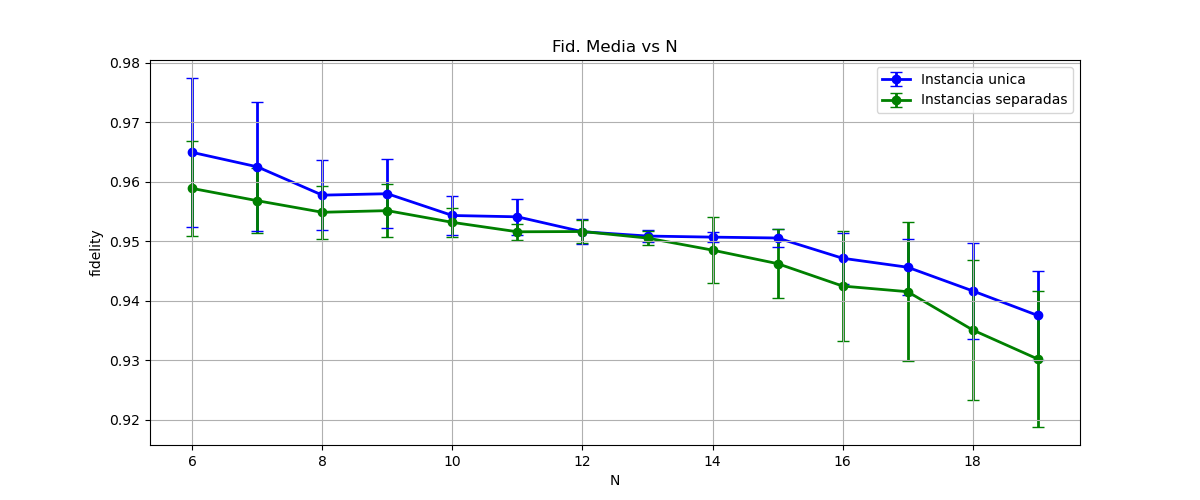

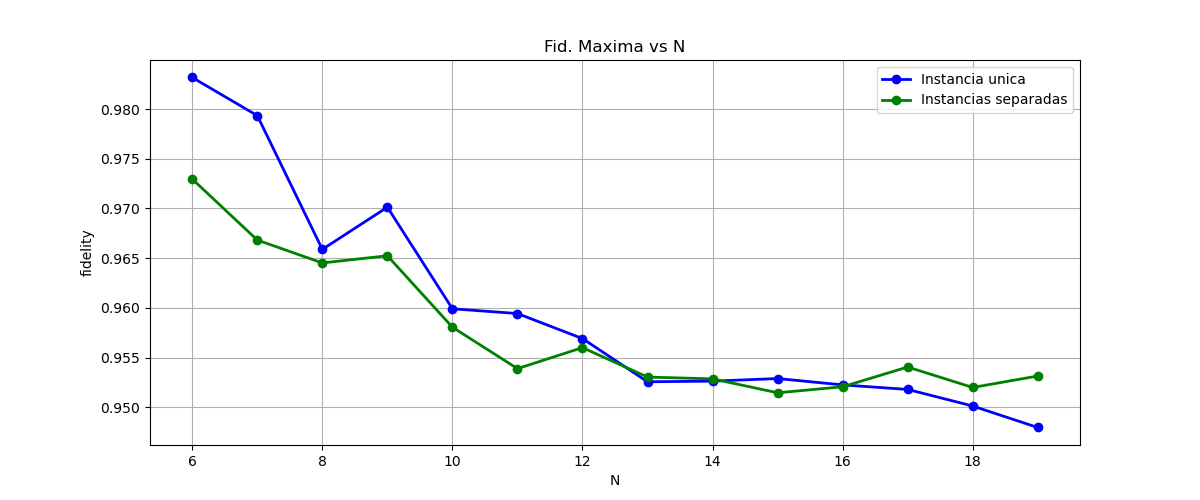

In [10]:

compare_mean([original_version,separated_instances],title= 'Fid. Media vs N', attribute= 'fidelity',labels=['Instancia unica','Instancias separadas'])
compare_maxmin([original_version,separated_instances],title= 'Fid. Maxima vs N', attribute= 'fidelity',labels=['Instancia unica','Instancias separadas'])

#plt.plot(data['dimension'],3*data['dimension'])

True

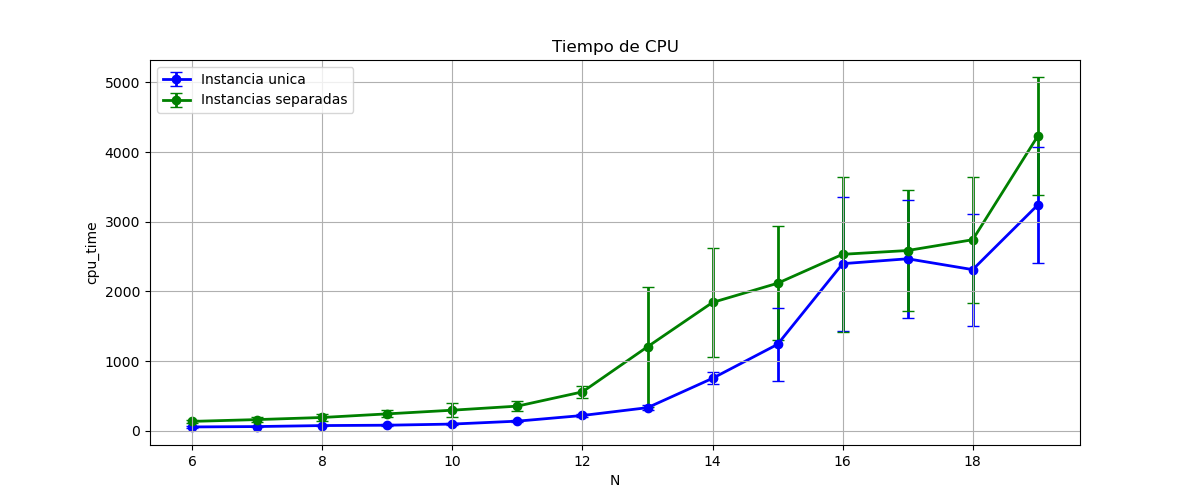

In [11]:

compare_mean([original_version,separated_instances],title= 'Tiempo de CPU', attribute= 'cpu_time',labels=['Instancia unica','Instancias separadas'])
#plt.plot(data['dimension'],3*data['dimension'])

In [12]:

compare_mean([og_fid_data,time_dep_data],title= 'Tiempo de transmisión vs N', attribute= 'time',labels=['Fit = F(t)','Fit dep del tiempo'])
compare_maxmin([og_fid_data,time_dep_data],maxmin='min',title= 'Tiempo de transmisión vs N', attribute= 'time',labels=['Fit = F(t)','Fit dep del tiempo'])

plt.plot(og_fid_data['dimension'],1.5*og_fid_data['dimension'], label = '1.5*N')
plt.legend()

NameError: name 'og_fid_data' is not defined